<a href="https://colab.research.google.com/github/ydydydydydy/Colab/blob/main/ex04_%EA%B0%9C_%EA%B3%A0%EC%96%91%EC%9D%B4_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CNN(Convolution Neural Network)
  - 이미지 학습 가능(2차원의 데이터도 학습)
  - 데이터에서 특징을 추출하고 추출된 특징을 기반으로 학습
    - 이미지의 크기, 방향 등에 크게 관여하지 않는다
    

##### 축소샘플링
      - Conv(특징찾기) : 이미지에 적용시키면 전체 데이터의 크기가 줄어듦
      - 축소 샘플링 진행할 때 :
          1. 데이터의 크기가 너무 클 때
          2. 가장자리의 데이터가 필요없을 때
           padding = 'valid'
      - 축소 샘플링 진행하지 않을 때 :
          1. 데이터가 너무 작을 때
          2. 가장자리에 중요한 데이터가 있을 때
            padding = 'same'

Pooling
  - 특정 지역의 대표값만 추출
  - 축소샘플링이 이루어짐 > 특징 집약적인 데이터가 만들어짐 > 학습시간은 감소 > 성능은 비슷

Flatten
  - 다차원의 데이터를 1차원으로 만들어주는 역할
  - Conv > Pool > Flatten > Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# /content/drive/MyDrive/Colab Notebooks/DeepLearning/data/dogs_vs_cats_small
# 데이터 경로지정
train_dir = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/dogs_vs_cats_small/train'
valid_dir = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/dogs_vs_cats_small/test'

train_dir_dog = os.path.join(train_dir, "dogs")
train_dir_cat = os.path.join(train_dir, "cats")
valid_dir_dog = os.path.join(valid_dir, "dogs")
valid_dir_cat = os.path.join(valid_dir, "cats")

In [ ]:
import os

print(f"훈련데이터 갯수 (개) : {len(os.listdir(train_dir_dog))}")
print(f"훈련데이터 갯수 (고양이) : {len(os.listdir(train_dir_cat))}")
print(f"테스트데이터 갯수 (개) : {len(os.listdir(valid_dir_dog))}")
print(f"테스트데이터 갯수 (고양이) : {len(os.listdir(valid_dir_cat))}")

훈련데이터 갯수 (개) : 1000
훈련데이터 갯수 (고양이) : 1000
테스트데이터 갯수 (개) : 11
테스트데이터 갯수 (고양이) : 11


In [ ]:
# 하나의 변수에 이미지 파일 전부다 합치기
# 픽셀값( 0 ~ 255 / 정수 ) (변경) --> ( 0 ~ 1 까지의 / 실수값 )
## 1. 숫자 크기 줄이기 > 연산량 감소
## 2. 분산(값이 분포해있는 범) 줄이기 > 연산의 오류 줄어듦
# 이미지 크기 맞춰주기 (150,150)
# 라벨링
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# 픽셀값 변경 기능 만들기
# 묵시적 형변환 하기
## 프로그래밍에서 연산상에서 타입이 변경되도록 하기
generator = ImageDataGenerator(rescale = 1./255) # 1. = 1.0

In [ ]:
# 하나의 변수에 이밎 파일 전부다 합치기
# 이미지 크기 동일하게 만들어주기
# 라벨링
train_generator = generator.flow_from_directory(
    directory = train_dir, # train 이미지 경로, 변환할 이미지
    target_size = (150,150),  # 변환할 이미지 크기
    batch_size = 100,  # 한번에 변환할 이미지 갯수
    class_mode = 'binary'  # 라벨링 방법, 다중분류 : categorical
)

Found 2000 images belonging to 2 classes.


In [ ]:
valid_generator = generator.flow_from_directory(
    directory = valid_dir, # train 이미지 경로, 변환할 이미지
    target_size = (150,150), # 변환할 이미지 크기
    batch_size = 100, # 한번에 변환할 이미지 갯수
    class_mode = 'binary' # 라벨링 방법, 다중분류 : categorical
)

Found 22 images belonging to 2 classes.


In [ ]:
# CNN 모델 설계
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
# Dense 만 사용 = MLP
# Conv, Pool이 주로 사용된다 = CNN
# 딥러닝 모델 생성(CNN)
# 건물 토대 설계
model1 = Sequential()

# 입력층
model1.add(Conv2D( # 특징 찾기
    filters = 32, # 찾을 특징의 갯수
    kernel_size = (3,3), # 특징의 크기
    input_shape = (150,150,3), # 입력 데이터의 모양(3 = RGB) # 0 : 검은색 , 255 : 흰색
    activation = 'relu'
))

model1.add(MaxPool2D( # 특징이 아닌부분 삭제하기
    pool_size = (2,2) # 기준 크기에서 1개의 특징만 가져오기 / 4개중에 한개 사용하기
))

model1.add(Conv2D( # 특징 찾기
    filters = 32, # 찾을 특징의 갯수
    kernel_size = (3,3), # 특징의 크기
    activation = 'relu'
))

model1.add(MaxPool2D( # 특징이 아닌부분 삭제하기
    pool_size = (2,2) # 기준 크기에서 1개의 특징만 가져오기 / 4개중에 한개 사용하기
))


model1.add(Conv2D( # 특징 찾기
    filters = 32, # 찾을 특징의 갯수
    kernel_size = (3,3), # 특징의 크기
    activation = 'relu'
))

model1.add(MaxPool2D( # 특징이 아닌부분 삭제하기
    pool_size = (2,2) # 기준 크기에서 1개의 특징만 가져오기 / 4개중에 한개 사용하기
))

model1.add(Conv2D( # 특징 찾기
    filters = 128, # 찾을 특징의 갯수
    kernel_size = (3,3), # 특징의 크기
    activation = 'relu'
))

model1.add(MaxPool2D( # 특징이 아닌부분 삭제하기
    pool_size = (2,2) # 기준 크기에서 1개의 특징만 가져오기 / 4개중에 한개 사용하기
))

model1.add(Conv2D( # 특징 찾기
    filters = 64, # 찾을 특징의 갯수
    kernel_size = (3,3), # 특징의 크기
    activation = 'relu'
))

model1.add(MaxPool2D( # 특징이 아닌부분 삭제하기
    pool_size = (2,2) # 기준 크기에서 1개의 특징만 가져오기 / 4개중에 한개 사용하기
))

##############특징 추출부 끝################
model1.add(Flatten()) # 특징추출부와 분류부를 이어주는 역할
##########분류 분석 시작#############
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 128, activation = 'relu'))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 32, activation = 'relu'))
# 출력층
model1.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
# 학습 방법 설정
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
model1.fit(
    train_generator, # 학습 데이터(X_train, y_train이 합쳐져 있다)
    epochs = 20,
    validation_data = valid_generator
)

Epoch 1/20
20/20 [==============================] - 587s 28s/step - loss: 0.6931 - accuracy: 0.5225 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/20
20/20 [==============================] - 7s 323ms/step - loss: 0.6903 - accuracy: 0.5275 - val_loss: 0.6937 - val_accuracy: 0.6364
Epoch 3/20
20/20 [==============================] - 7s 330ms/step - loss: 0.6788 - accuracy: 0.5945 - val_loss: 0.6903 - val_accuracy: 0.6364
Epoch 4/20
20/20 [==============================] - 7s 342ms/step - loss: 0.6619 - accuracy: 0.6090 - val_loss: 0.6961 - val_accuracy: 0.5909
Epoch 5/20
20/20 [==============================] - 6s 320ms/step - loss: 0.6464 - accuracy: 0.6335 - val_loss: 0.6727 - val_accuracy: 0.5909
Epoch 6/20
20/20 [==============================] - 6s 305ms/step - loss: 0.6331 - accuracy: 0.6535 - val_loss: 0.6831 - val_accuracy: 0.5000
Epoch 7/20
20/20 [==============================] - 7s 357ms/step - loss: 0.5977 - accuracy: 0.6885 - val_loss: 0.6095 - val_accuracy: 0.7727
Epoch 

In [ ]:
import PIL.Image as pimg
import cv2
# 이미지 불러오기
pre_img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/dogs_vs_cats_small/test/cats/cat.1500.jpg',cv2.IMREAD_COLOR)
# 이미지 색상 변경하기
pre_img = cv2.cvtColor(pre_img, cv2.COLOR_BGR2RGB)
# 이미지 크기 변경하기
pre_img = cv2.resize(pre_img,(150,150))
# 이미지  차원 변경하기
pre_img = pre_img.reshape((1,150,150,3))

In [ ]:
# 0 = cat
# 1 = dog
# 대다수의 사람은 개라는 결과를 얻는다 = 모델이 학습이 덜 돼서 개의 규칙은 잘 찾았지만 고양이의 규칙은  찾지 못했기 때문
model1.predict(pre_img)

1/1 [==============================] - 0s 325ms/step


array([[1.]], dtype=float32)

In [ ]:
# 부동소수점 : 소수점의 위치가 변하지 않는다
# 1.7243704e-35 = 1.7243704 * 10^(-35) / 0이라고 봐도 무방

In [ ]:
# train accuracy : 0.98
# val accuracy : 0.7
# > train은 학습이 잘 됐고, val은 학습이 안됐다 > 과대적합에 걸렸다
#  과대적합을 해소하는 방법
# 1. 데이터의 양을 늘린다(추가적으로 데이터를 수집) > 많이 어렵다
# 2. 모델을 더 깊게 구성한다 (층을 더 많이 쌓는다)
# 3. 데이터를 확장한다(가지고 있는 데이터를 다양하게 표현)

In [ ]:
# 데이터 확장을 하고 새롭게 학습한다
# 데이터를 확장하면 원본 데이터는 사라진다
# 모델 설계 > 확장 안된 이미지로 학습 > 결과 확인 > 만족스럽지 않다 > 데이터 확장 후 학습

In [ ]:
# 기존 모델에 확장 데이터로 학습하기
# 확장의 방법 골라주기
aug_generator = ImageDataGenerator(
    rescale = 1./255, # 픽셀값 조정
    rotation_range = 20, # 회전 범위
    width_shift_range = 0.1, # 수평 이동
    height_shift_range = 0.1, # 수직 이동
    shear_range = 0.1, # 반시계 방향 회전
    zoom_range = 0.1, # 확대/축소 비율
    horizontal_flip = True, # 수평 뒤집기
    fill_mode = 'nearest' # 가까운 값으로 비어있는 곳을 채운다
)

In [ ]:
train_aug_generator = aug_generator.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 100,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [ ]:
model1.fit(
    train_aug_generator,
    epochs = 20,
    validation_data = valid_generator,
)

Epoch 1/20
20/20 [==============================] - 18s 913ms/step - loss: 0.6150 - accuracy: 0.7310 - val_loss: 0.5542 - val_accuracy: 0.6818
Epoch 2/20
20/20 [==============================] - 22s 1s/step - loss: 0.5513 - accuracy: 0.7355 - val_loss: 0.5573 - val_accuracy: 0.7273
Epoch 3/20
20/20 [==============================] - 21s 1s/step - loss: 0.4860 - accuracy: 0.7745 - val_loss: 0.5934 - val_accuracy: 0.6818
Epoch 4/20
20/20 [==============================] - 20s 1s/step - loss: 0.4751 - accuracy: 0.7740 - val_loss: 0.5678 - val_accuracy: 0.7727
Epoch 5/20
20/20 [==============================] - 20s 956ms/step - loss: 0.4818 - accuracy: 0.7690 - val_loss: 0.4924 - val_accuracy: 0.7727
Epoch 6/20
20/20 [==============================] - 20s 1s/step - loss: 0.4624 - accuracy: 0.7860 - val_loss: 0.5671 - val_accuracy: 0.7273
Epoch 7/20
20/20 [==============================] - 20s 1s/step - loss: 0.4534 - accuracy: 0.7900 - val_loss: 0.6053 - val_accuracy: 0.8182
Epoch 8/20
20/

### 과대적합을 줄이는 방법들
  - 증식
    - 장점 : 간단하다
    - 단점 : 가짜는 가짜다(급격한 성능 향상은 없음)
    - epoch 수는 증가시켜주어야 한다
  - dropout()
    - 층에 사용하는 퍼셉트론의 수를 설정한 비율만큼 사용하지 않는 방법
    - epoch마다 사용하지 않는 퍼셉트론은 랜덤
  - BatchNormalization
    - CNN층 = Conv (특성추출) + Maxpooling (크기 축소)
    - Conv층의 파라미터를 정규화 (평균 0, 분산 1)
      -> 음수가 발생
      -> relu를 적용하면 음수가 사라지는 문제 --> leaky relu
  - GlobalAveragePooling2D()
    - CNN 가장 문제가 되는 층 : Maxpooling 층
      -> CNN 속도의 60% 이상을 차지

    - Maxpooling2D + Flatten()
    - Dense 층과 연결되는 층에 사용

- Data Generator : 학습 시킬 때 한 번에 전체 데이터를 가져오는 것이 아니라 batch_size만큼씩만 가져와서 처리하도록 하는 것(메모리 자원 부족을 해결)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(rescale = 1./255)

train_generator = generator.flow_from_directory(
    directory = train_dir,
    target_size = (150,150),
    batch_size = 100,
    class_mode = 'binary'
)

valid_generator = generator.flow_from_directory(
    directory = valid_dir,
    target_size = (150,150),
    batch_size = 100,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


In [ ]:
# 라벨은 알파벳 순으로 0부터 부여
train_generator.class_indices, valid_generator.class_indices

({'cats': 0, 'dogs': 1}, {'cats': 0, 'dogs': 1})

### 신경망 설계

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization, GlobalAveragePooling2D

model1 = Sequential()

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    input_shape = (150,150,3), activation = 'relu'))
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    activation = 'relu'))
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    activation = 'relu'))
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 128, kernel_size = (3,3),
    activation = 'relu'))
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 64, kernel_size = (3,3),
    activation = 'relu'))
model1.add(MaxPool2D( pool_size = (2,2)))

model1.add(Flatten())

model1.add(Dropout(0.5))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 128, activation = 'relu'))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 32, activation = 'relu'))

model1.add(Dense(units = 1, activation = 'sigmoid'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 17, 17, 32)       

In [ ]:
# 학습 방법 설정
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
model1.fit(
    train_generator, # 학습 데이터(X_train, y_train이 합쳐져 있다.)
    epochs = 20,
    validation_data = valid_generator
)

Epoch 1/20
20/20 [==============================] - 10s 322ms/step - loss: 0.6941 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/20
20/20 [==============================] - 7s 326ms/step - loss: 0.6915 - accuracy: 0.5220 - val_loss: 0.6916 - val_accuracy: 0.5455
Epoch 3/20
20/20 [==============================] - 7s 355ms/step - loss: 0.6841 - accuracy: 0.5455 - val_loss: 0.6959 - val_accuracy: 0.5455
Epoch 4/20
20/20 [==============================] - 6s 315ms/step - loss: 0.6868 - accuracy: 0.5500 - val_loss: 0.6879 - val_accuracy: 0.5455
Epoch 5/20
20/20 [==============================] - 7s 349ms/step - loss: 0.6708 - accuracy: 0.5750 - val_loss: 0.6785 - val_accuracy: 0.5455
Epoch 6/20
20/20 [==============================] - 6s 303ms/step - loss: 0.6536 - accuracy: 0.6145 - val_loss: 0.6859 - val_accuracy: 0.5455
Epoch 7/20
20/20 [==============================] - 6s 312ms/step - loss: 0.6349 - accuracy: 0.6470 - val_loss: 0.6288 - val_accuracy: 0.6818
Epoch

- GlobalAveragePooling2D()

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization, GlobalAveragePooling2D

model1 = Sequential()

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    input_shape = (150,150,3), activation = 'relu'))
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    activation = 'relu'))
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    activation = 'relu'))
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 128, kernel_size = (3,3),
    activation = 'relu'))
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 64, kernel_size = (3,3),
    activation = 'relu'))
#model1.add(MaxPool2D( pool_size = (2,2)))

#model1.add(Flatten())

model1.add(GlobalAveragePooling2D())

model1.add(Dropout(0.5))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 128, activation = 'relu'))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 32, activation = 'relu'))

model1.add(Dense(units = 1, activation = 'sigmoid'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 36, 36, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 17, 17, 32)       

In [ ]:
# 학습 방법 설정
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
model1.fit(
    train_generator, # 학습 데이터(X_train, y_train이 합쳐져 있다.)
    epochs = 20,
    validation_data = valid_generator
)

Epoch 1/20
20/20 [==============================] - 11s 289ms/step - loss: 0.6938 - accuracy: 0.4900 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/20
20/20 [==============================] - 7s 340ms/step - loss: 0.6918 - accuracy: 0.5375 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 3/20
20/20 [==============================] - 6s 296ms/step - loss: 0.6878 - accuracy: 0.5430 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/20
20/20 [==============================] - 6s 313ms/step - loss: 0.6824 - accuracy: 0.5660 - val_loss: 0.6854 - val_accuracy: 0.5909
Epoch 5/20
20/20 [==============================] - 6s 319ms/step - loss: 0.6730 - accuracy: 0.5820 - val_loss: 0.6796 - val_accuracy: 0.5909
Epoch 6/20
20/20 [==============================] - 7s 328ms/step - loss: 0.6543 - accuracy: 0.6135 - val_loss: 0.6525 - val_accuracy: 0.6364
Epoch 7/20
20/20 [==============================] - 6s 304ms/step - loss: 0.6578 - accuracy: 0.6155 - val_loss: 0.6541 - val_accuracy: 0.6818
Epoch

- BatchNormalization()
  - Conv2D()와 Activation() 층 사이에 배치
  - Activation()이 정규화 기능을 일부 수행 -> Activation() 다음에 배치하면 효과가 떨어짐 -> C + B + A + M => C + A + B + M

  - 확실하게 성능이 향상됨
  - 단점 : 설명할 방법이 없음(왜 좋아졌는지)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation

model1 = Sequential()

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    input_shape = (150,150,3)))
model1.add(BatchNormalization())
model1.add(Activation("leaky_relu"))
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    activation = 'leaky_relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    activation = 'leaky_relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 128, kernel_size = (3,3),
    activation = 'leaky_relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 64, kernel_size = (3,3),
    activation = 'leaky_relu'))
model1.add(BatchNormalization())
#model1.add(MaxPool2D( pool_size = (2,2)))

#model1.add(Flatten())

model1.add(GlobalAveragePooling2D())

model1.add(Dropout(0.5))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 128, activation = 'relu'))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 32, activation = 'relu'))

model1.add(Dense(units = 1, activation = 'sigmoid'))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 32)       

In [ ]:
# 학습 방법 설정
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
model1.fit(
    train_generator, # 학습 데이터(X_train, y_train이 합쳐져 있다.)
    epochs = 20,
    validation_data = valid_generator
)

Epoch 1/20
20/20 [==============================] - 13s 350ms/step - loss: 0.6673 - accuracy: 0.6035 - val_loss: 0.7058 - val_accuracy: 0.5000
Epoch 2/20
20/20 [==============================] - 6s 308ms/step - loss: 0.5982 - accuracy: 0.7060 - val_loss: 0.9871 - val_accuracy: 0.5000
Epoch 3/20
20/20 [==============================] - 7s 357ms/step - loss: 0.5636 - accuracy: 0.7100 - val_loss: 1.3237 - val_accuracy: 0.5000
Epoch 4/20
20/20 [==============================] - 8s 373ms/step - loss: 0.5385 - accuracy: 0.7325 - val_loss: 1.1251 - val_accuracy: 0.5000
Epoch 5/20
20/20 [==============================] - 6s 316ms/step - loss: 0.5095 - accuracy: 0.7570 - val_loss: 1.4093 - val_accuracy: 0.5000
Epoch 6/20
20/20 [==============================] - 7s 356ms/step - loss: 0.4731 - accuracy: 0.7795 - val_loss: 1.8472 - val_accuracy: 0.5000
Epoch 7/20
20/20 [==============================] - 6s 303ms/step - loss: 0.4568 - accuracy: 0.7975 - val_loss: 1.7097 - val_accuracy: 0.5000
Epoch

# 전이학습 (Transfer Learning)
  - 미리 학습된 모델이나 가중치를 가져다 쓰는 기법
  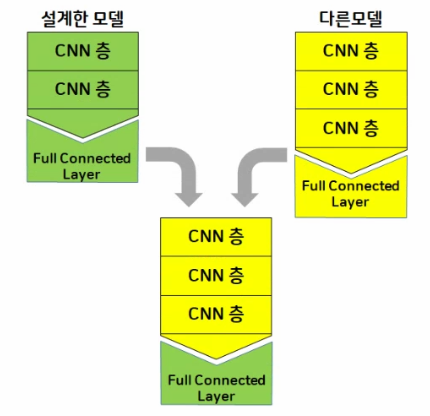

- 전이학습을 하는 이유
  - 데이터 부족
  - 설계한 신경망이 좋지 못할 때

- 전이학습의 종류
  - 특성추출 : CNN층의 가중치를 그대로 사용
  - 미세조정(fine turning) : CNN층의 가중치를 일부 살짝 변경해서 사용

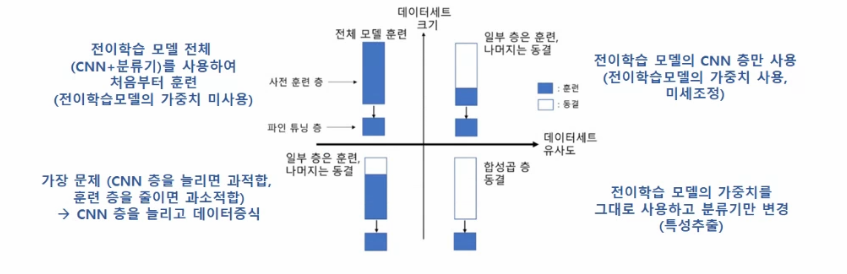

- VGG16을 다운로드

In [ ]:
from tensorflow.keras.applications import VGG16

# weights : 사용할 가중치의 종류(imagenet)
# include_top = False : 모델을 전체 또는 특성추출기만 가져올 것인지는 선택 (False : 특성추출기만 가져옴)
# input_shape :
conv_base = VGG16(weights="imagenet",
                  include_top=False,
                  input_shape = (150, 150, 3))

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
# VGG16 모델을 확인
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

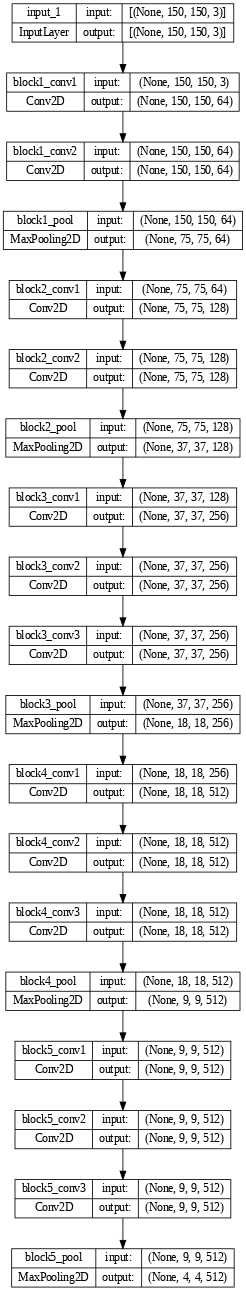

In [ ]:
# plot_model()로 시각화
from tensorflow.keras.utils import plot_model

# show_shapes=True : 신경망 형태 표시 여부
# dpi=60 : 이미지 출력 크기
plot_model(conv_base, show_shapes=True, dpi=60)

- 신경망 구조를 이미지로 시각화

In [ ]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 18.5 MB/s eta 0:00:00


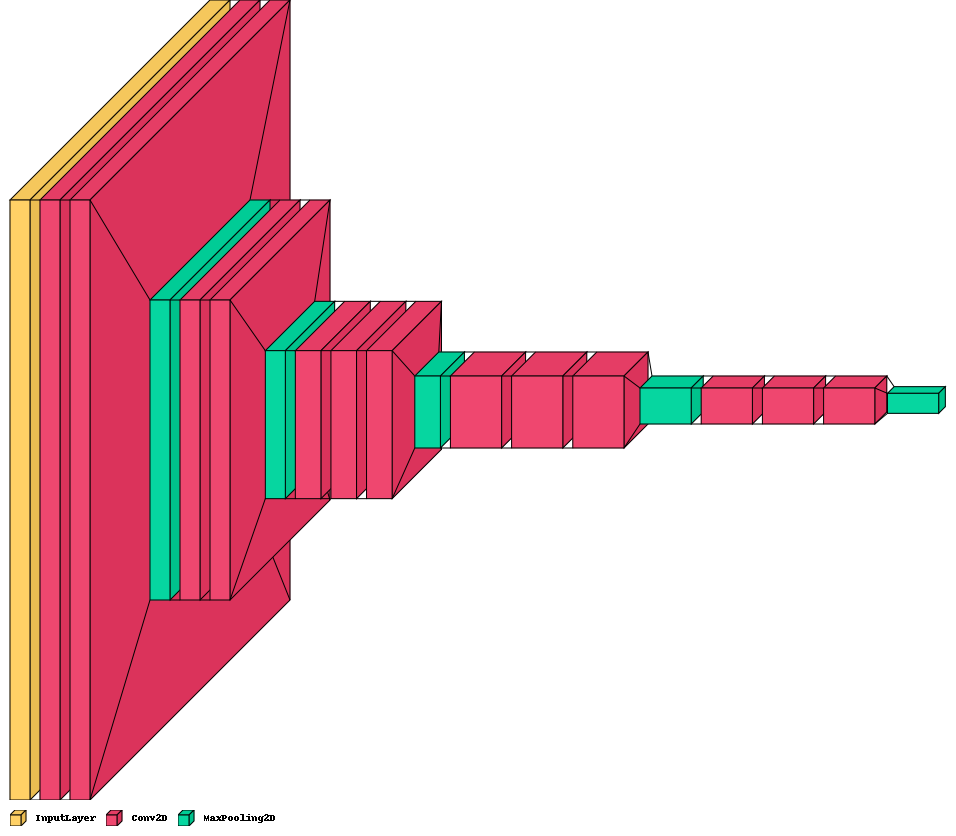

In [ ]:
import visualkeras

# 신경망 층을 시각화
visualkeras.layered_view(conv_base).show()
# 층 이름의 범례 표시
visualkeras.layered_view(conv_base, legend=True)

- 학습이 가능한 파라미터 종류의 수를 확인

In [ ]:
print(f"학습 가능한 파라미터 종류의 수 : {len(conv_base.trainable_weights)}")

학습 가능한 파라미터 종류의 수 : 26


- 우리 모델에 VGG16을 연결

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

model1 = Sequential()

# VGG16 연결
model1.add(conv_base)

model1.add(Flatten())

model1.add(Dropout(0.5))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 128, activation = 'relu'))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 32, activation = 'relu'))
model1.add(Dense(units = 1, activation = 'sigmoid'))

model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dropout_3 (Dropout)         (None, 8192)              0         
                                                                 
 dense_20 (Dense)            (None, 64)                524352    
                                                                 
 dense_21 (Dense)            (None, 128)               8320      
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 32)               

- 동결: 가져온 모델은 학습이 되지 않도록 설정

In [ ]:
print(f"훈련 가능한 파라미터의 종류 : {len(model1.trainable_weights)}")

훈련 가능한 파라미터의 종류 : 36


In [ ]:
# VGG16모델은 훈련이 되지 않도록 설정
conv_base.trainable = False

In [ ]:
print(f"훈련 가능한 파라미터의 종류 : {len(model1.trainable_weights)}")

훈련 가능한 파라미터의 종류 : 10


In [ ]:
# 학습 방법 설정
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
model1.fit(
    train_generator, # 학습 데이터(X_train, y_train 이 합쳐져 있다)
    epochs = 20,
    validation_data = valid_generator
)

Epoch 1/20
20/20 [==============================] - 18s 427ms/step - loss: 0.4993 - accuracy: 0.7390 - val_loss: 0.2686 - val_accuracy: 0.8636
Epoch 2/20
20/20 [==============================] - 7s 356ms/step - loss: 0.3157 - accuracy: 0.8565 - val_loss: 0.3013 - val_accuracy: 0.8182
Epoch 3/20
20/20 [==============================] - 7s 326ms/step - loss: 0.2262 - accuracy: 0.9085 - val_loss: 0.1871 - val_accuracy: 0.9091
Epoch 4/20
20/20 [==============================] - 7s 365ms/step - loss: 0.1975 - accuracy: 0.9200 - val_loss: 0.2413 - val_accuracy: 0.8636
Epoch 5/20
20/20 [==============================] - 7s 347ms/step - loss: 0.1755 - accuracy: 0.9310 - val_loss: 0.2206 - val_accuracy: 0.8636
Epoch 6/20
20/20 [==============================] - 7s 365ms/step - loss: 0.1509 - accuracy: 0.9365 - val_loss: 0.2178 - val_accuracy: 0.9091
Epoch 7/20
20/20 [==============================] - 7s 342ms/step - loss: 0.1186 - accuracy: 0.9530 - val_loss: 0.2167 - val_accuracy: 0.9091
Epoch

- 미세조정 (fine turning) : 분류기가 연결되는 모델의 층만 학습이 되도록 동결을 풀어주는 것

In [44]:
# 마지막층 (5번째층)만 학습이 되도록 동결을 품
# 모델이 훈련 가능하도록 설정
conv_base.trainable = True

set_trainable = False

# 각 층을 돌면서 block5_conv1을 만나면 동결 해제
for layer in conv_base.layers :
  if layer.name == "block5_conv1" :
    set_trainable = True

  if set_trainable :
    layer.trainable = True
  else :
    layer.trainable = False

In [47]:
print(f"훈련 가능한 파라미터의 종류 : {len(model1.trainable_weights)}")

훈련 가능한 파라미터의 종류 : 16


In [45]:
# 학습 방법 설정
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
model1.fit(
    train_generator, # 학습 데이터(X_train, y_train이 합쳐져 있다.)
    epochs = 20,
    validation_data = valid_generator
)

- Xception 모델을 전이학습

In [48]:
from tensorflow.keras.applications import Xception

conv_base2 = Xception(weights="imagenet",
                      include_top=False,
                      input_shape=(150, 150, 3))

83683744/83683744 [==============================] - 5s 0us/step


In [ ]:
conv_base2.summary()

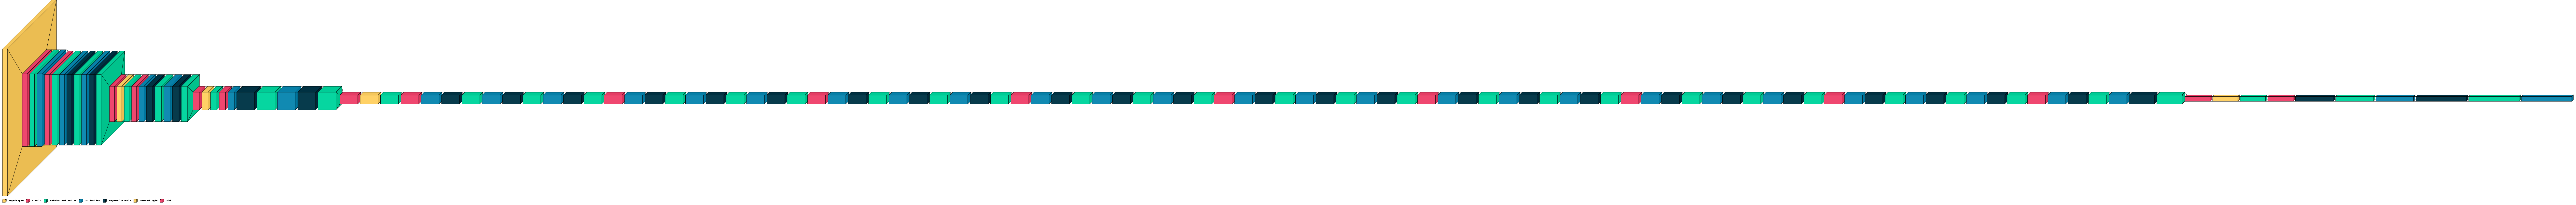

In [50]:
visualkeras.layered_view(conv_base2).show()
visualkeras.layered_view(conv_base2, legend=True)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

model1 = Sequential()

# VGG16 연결
model1.add(conv_base)

model1.add(Flatten())

model1.add(Dropout(0.5))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 128, activation = 'relu'))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 32, activation = 'relu'))
model1.add(Dense(units = 1, activation = 'sigmoid'))

model1.summary()

In [52]:
# Xception모델은 훈련이 되지 않도록 설정
conv_base2.trainable = False

In [54]:
# 학습 방법 설정
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [55]:
model1.fit(
    train_generator, # 학습 데이터(X_train, y_train이 합쳐져 있다.)
    epochs = 20,
    validation_data = valid_generator
)

Epoch 1/20
20/20 [==============================] - 10s 340ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/20
20/20 [==============================] - 7s 319ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/20
20/20 [==============================] - 8s 373ms/step - loss: 0.6932 - accuracy: 0.4820 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/20
20/20 [==============================] - 7s 327ms/step - loss: 0.6932 - accuracy: 0.4800 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/20
20/20 [==============================] - 7s 361ms/step - loss: 0.6932 - accuracy: 0.4960 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/20
20/20 [==============================] - 7s 320ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/20
20/20 [==============================] - 7s 355ms/step - loss: 0.6932 - accuracy: 0.4870 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch